In [18]:
import numpy as np
D = np.loadtxt("../GM12878/chr19_50kb/chr19_50000.dist")
xyz = np.loadtxt("../GM12878/chr19_50kb/structure/NeRV.xyz")
d = np.zeros((len(xyz), len(xyz)))
for i in range(len(xyz)):
    for j in range(len(xyz)):
        if not np.isnan(xyz[i]).any() and not np.isnan(xyz[j]).any():
            d[i,j]=np.sqrt(np.sum((xyz[i] - xyz[j])**2))

print(len(D),len(d))

1181 1181


<Figure size 600x600 with 0 Axes>

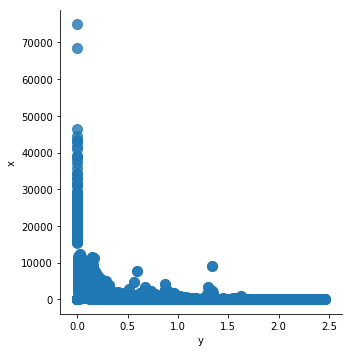

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'x':D.reshape(-1),'y':d.reshape(-1)})

plt.figure(figsize=(6,6),dpi=100)
sns.lmplot(x="y", y="x", data=df,scatter_kws={"s": 100})
plt.show()

In [4]:
import numpy as np
A = np.loadtxt("../IMR90/chr21/chr21_25000.dist")
x1 = np.loadtxt("./restad.xyz")
x2 = np.loadtxt("./resall.xyz")

d = np.zeros((len(x1), len(x1)))
for i in range(len(x1)):
    for j in range(len(x1)):
        d[i,j]=np.sqrt(np.sum((x1[i] - x1[j])**2))

D = np.zeros((len(x2), len(x2)))
for i in range(len(x2)):
    for j in range(len(x2)):
        D[i,j]=np.sqrt(np.sum((x2[i] - x2[j])**2))

import pandas as pd
df = pd.DataFrame({'dist':A.reshape(-1),'tad':d.reshape(-1),'all':D.reshape(-1)})
print(df.corr())
print(df.corr('spearman'))

           all      dist       tad
all   1.000000  0.774215  0.803384
dist  0.774215  1.000000  0.736618
tad   0.803384  0.736618  1.000000
           all      dist       tad
all   1.000000  0.743284  0.789431
dist  0.743284  1.000000  0.731424
tad   0.789431  0.731424  1.000000


In [2]:
import pandas as pd
df = pd.DataFrame({'D':D.reshape(-1),'d':d.reshape(-1)})
print(df.corr())
print(df.corr('spearman'))

         D        d
D  1.00000  0.89375
d  0.89375  1.00000
          D         d
D  1.000000  0.859586
d  0.859586  1.000000


In [17]:
# dPCC
import math

D_ = np.mean(D)
d_ = np.mean(d)
# 分子
num = 0
# 分母
den1 = 0
den2 = 0
for i in range(len(d)):
    for j in range(len(d)):
        num = num + ((d[i,j]-d_)*(D[i,j]-D_))
        den1 = den1 + (d[i,j]-d_)**2
        den2 = den2 + (D[i,j]-D_)**2

den = math.sqrt(den1*den2)
dPCC = num/den
print(dPCC)

0.824243703322313


In [18]:
# dSCC
import math

X = np.argsort(d)
Y = np.argsort(D)
X_ = np.mean(X)
Y_ = np.mean(Y)

# 分子
num = 0
# 分母
den1 = 0
den2 = 0
for i in range(len(X)):
    for j in range(len(X)):
        num = num + ((X[i,j]-X_)*(Y[i,j]-Y_))
        den1 = den1 + (X[i,j]-X_)**2
        den2 = den2 + (Y[i,j]-Y_)**2

den = math.sqrt(den1*den2)
dSCC = num/den
print(dSCC)


0.5037416161551755


In [3]:
# dRMSE
import math
def calcDistance(coord1, coord2):
    """Euclidean distance between coordinates"""
    return ((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2 +  (coord1[2] - coord2[2])**2)**(1./2)

def radius_of_gyration(coords):
    centroid = np.mean(coords, axis=0)
    dist_sum = sum([calcDistance(coord, centroid) for coord in coords])
    return dist_sum/len(coords)

scaling_factor = radius_of_gyration(D)/radius_of_gyration(d)
drms = 0
for i in range(len(D)):
    for j in range(len(d)):
        drms = drms + (d[i,j] * scaling_factor-D[i,j])**2
drms = drms / (len(D)**2)
drms = math.sqrt(drms)
print(drms)


0.22195201066608142
